In [1]:
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from classy import Class

In [2]:
font = {'size': 14}
axislabelfontsize='large'
matplotlib.rc('font', **font)

In [3]:
from pybird.correlator import Correlator
dk, ds = 0.01, 5
kd = np.arange(0.005, 0.3, dk)
sd = np.arange(10, 200, ds)
z = 0.57

### The **CLASS** / **PyBird** compatibility 'lazy hack'

Too tired to think what linear cosmology to give to **PyBird** for it to compute?  
No problem (if you have **CLASS** installed), just give to **PyBird** the cosmology that you usually give to **CLASS**, and **PyBird** will call **CLASS** for you. 

In [4]:
outdir = '../data/eftboss/out'
with open(os.path.join(outdir, 'fit_boss_onesky_pk_wc_cmass_ngc_l0.dat')) as f: data_file = f.read()
eft_params_str = data_file.split(', \n')[1].replace("# ", "")
eft_params = {key: float(value) for key, value in (pair.split(': ') for pair in eft_params_str.split(', '))}
print (eft_params)

{'b1': 1.9605, 'c2': 0.6215, 'c4': 0.0, 'b3': -0.4816, 'cct': 0.3174, 'cr1': -0.8664, 'cr2': -0.8804, 'ce0': 1.3881, 'ce1': 0.0, 'ce2': -1.6003, 'b2': 0.4395, 'b4': 0.4395}


In [5]:
M = Class()
cosmo1 = {'omega_b': 0.02235, 'omega_cdm': 0.120, 'h': 0.675, 'ln10^{10}A_s': 3.044, 'n_s': 0.965}
M.set(cosmo1)
M.set({'output': 'mPk', 'P_k_max_h/Mpc': 1, 'z_max_pk': z})
M.compute()

In [6]:
cosmo2 = cosmo1.copy()


In [7]:
N = Correlator()

N.set({'output': 'bCf', 'multipole': 2, 'kmax': 0.3, 'xdata': sd, 
       'z': z,        # it is now important to specify the redshift for CLASS
       'km': 0.7, 'kr': 0.35, 'nd': 3e-4, 
       'eft_basis': 'eftoflss', 'with_stoch': True}) 

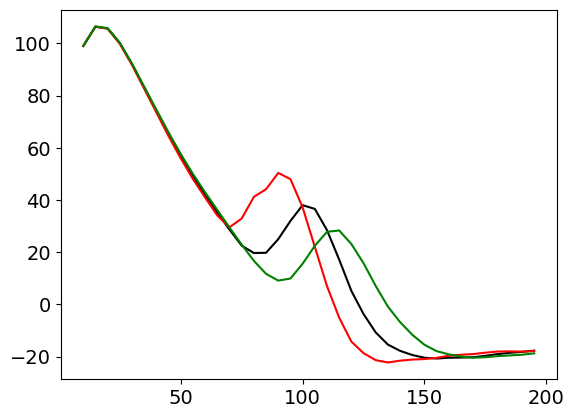

In [8]:
cosmo2['alpha_rs']=1
N.compute(cosmo2, cosmo_module='class', cosmo_engine=M) 
bPk = N.get(eft_params)
plt.plot(sd,sd**2*bPk[0],'k')


cosmo2['alpha_rs']=0.9
N.compute(cosmo2, cosmo_module='class', cosmo_engine=M) 
bPk = N.get(eft_params)
plt.plot(sd,sd**2*bPk[0],'r')



cosmo2['alpha_rs']=1.1
N.compute(cosmo2, cosmo_module='class', cosmo_engine=M) 
bPk = N.get(eft_params)
plt.plot(sd,sd**2*bPk[0],'g')



(0.005, 0.3)

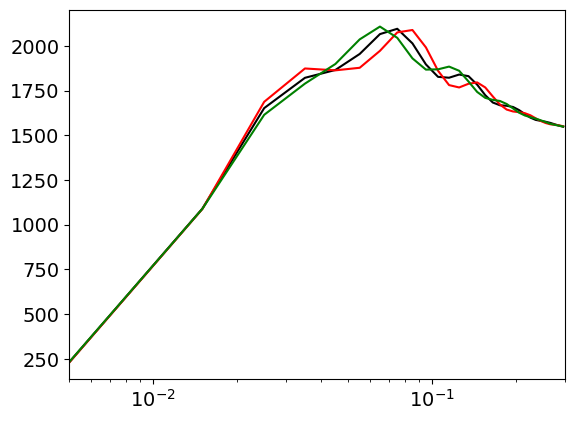

In [9]:
N = Correlator()

N.set({'output': 'bPk', 'multipole': 2, 'kmax': 0.3, 'xdata': kd, 
       'z': z,        # it is now important to specify the redshift for CLASS
       'km': 0.7, 'kr': 0.35, 'nd': 3e-4, 
       'eft_basis': 'eftoflss', 'with_stoch': True}) 


cosmo2['alpha_rs']=1
N.compute(cosmo2, cosmo_module='class', cosmo_engine=M) 
bPk = N.get(eft_params)
plt.semilogx(kd,kd*bPk[0],'k')


cosmo2['alpha_rs']=0.9
N.compute(cosmo2, cosmo_module='class', cosmo_engine=M) 
bPk = N.get(eft_params)
plt.semilogx(kd,kd*bPk[0],'r')



cosmo2['alpha_rs']=1.1
N.compute(cosmo2, cosmo_module='class', cosmo_engine=M) 
bPk = N.get(eft_params)
plt.semilogx(kd,kd*bPk[0],'g')
plt.xlim(0.005,0.3)



In [10]:
kd*bPk[0]

array([ 232.00788865, 1088.24454972, 1614.50515358, 1788.87022984,
       1898.7588548 , 2036.36541665, 2107.90506189, 2044.96016279,
       1930.18229423, 1867.22252711, 1868.83961419, 1884.1179475 ,
       1860.72139918, 1800.92639369, 1742.48255136, 1709.25572438,
       1697.99740561, 1691.82834033, 1674.98226568, 1650.25005112,
       1626.39166486, 1610.61367074, 1601.25000862, 1593.0804837 ,
       1583.86456125, 1573.89873023, 1564.36547154, 1558.38519577,
       1553.59610537, 1549.15430282])